In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import pylab as p

# Import feature selection package
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, f_classif, mutual_info_classif

#set your working_dir
working_dir = "."

# For .read_csv, always use header=0 when you know row 0 is the header row
df = pd.read_csv(working_dir+"/data/ElectionsData-full.csv", header=0)


numeric_fields = df.select_dtypes(exclude=["object"])

for f in numeric_fields:
    df[f].fillna(df[f].median(), inplace=True)
    
categorial_fields = df.select_dtypes(include=["object"])

# todo: improve to per vote
for f in categorial_fields:
    df[f].fillna(df[f].value_counts().idxmax(), inplace=True)
        
        
numeric_fields = df.select_dtypes(exclude=["object"])
threshold = 3

for f in numeric_fields:
    std = df[f].std()
    mean = df[f].mean()
    df = df[df[f].between(mean - threshold *std, mean + threshold *std)] 
    

numeric_fields = df.select_dtypes(exclude=["object"])

for f in numeric_fields:
    df[f] = (df[f] - df[f].min()) / (df[f].max() - df[f].min())
    
df["Age_groupInt"] = df["Age_group"].map( {'Below_30':0, '30-45':1, '45_and_up': 2}).astype(int)
df["Voting_TimeInt"] = df["Voting_Time"].map( {'By_16:00':0, 'After_16:00':1}).astype(int)
df["GenderInt"] = df["Gender"].map( {'Male':-1, 'Female':1}).astype(int)

def transform_bool(name):
    df[name + "Int"] = df[name].map( {'No':-1, "Maybe": 0, 'Yes':1}).astype(int)

def transform_category(name):
    for cat in df[name].unique():
        df["Is_" + name +"_" + cat] = (df[name] == cat).astype(int)
    
transform_bool("Looking_at_poles_results")
transform_bool("Married")
transform_bool("Financial_agenda_matters")
transform_bool("Will_vote_only_large_party")
transform_category("Most_Important_Issue")
transform_category("Occupation")
transform_category("Main_transportation")
    
feat_names = df.drop(['Vote'], axis=1).columns.values

varsel = VarianceThreshold(threshold=0.01)
a = varsel.fit_transform(df)
featsel_idx = varsel.get_support()
featsel_idx
# print 'Removing features with low variance - ','\t',feat_names[~featsel_idx]

NameError: name 'VarianceThreshold' is not defined

## First look at the data

In [2]:
df.head(10)

,Vote,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Most_Important_Issue,Avg_Satisfaction_with_previous_vote,Looking_at_poles_results,Garden_sqr_meter_per_person_in_residancy_area,Married,Gender,...,Last_school_grades,Age_group,Number_of_differnt_parties_voted_for,Political_interest_Total_Score,Number_of_valued_Kneset_members,Main_transportation,Occupation,Overall_happiness_score,Num_of_kids_born_last_10_years,Financial_agenda_matters
0,Purples,10.0,520.295896,67907.251293,Healthcare,173.431965,No,391.549799,Yes,Male,...,80.0,45_and_up,4.0,648.398790,10.0,Public_or_other,Hightech,407.311192,1.0,No
1,Greens,4.0,695.412346,71279.972232,Environment,231.804115,No,307.500892,Yes,Female,...,90.0,30-45,1.0,803.679617,14.0,Motorcycle_or_truck,Public_Sector,648.375461,0.0,No
2,Browns,2.0,102.471366,18386.508465,Healthcare,NaN,No,538.292084,No,Female,...,80.0,45_and_up,1.0,758.597288,7.0,Foot_or_bicycle,Services_or_Retail,516.331411,4.0,Yes
3,Pinks,6.0,392.898135,89911.733344,Social,130.966045,No,686.527056,No,Male,...,NaN,Below_30,4.0,901.290354,8.0,Motorcycle_or_truck,Student_or_Unemployed,486.496618,0.0,Yes
4,Blues,1.0,1825.062431,2697.309458,Healthcare,608.354144,Yes,4.433782,Yes,Male,...,80.0,Below_30,2.0,420.857985,11.0,Foot_or_bicycle,Industry_or_other,155.423697,NaN,Yes
5,Oranges,7.0,540.959917,75065.232654,Military,180.319972,No,416.289065,Yes,Female,...,30.0,30-45,1.0,564.394630,8.0,Motorcycle_or_truck,Public_Sector,445.666348,0.0,No
6,Greens,9.0,295.794850,24974.177209,Healthcare,98.598283,No,253.292211,Yes,Male,...,80.0,Below_30,1.0,782.689892,14.0,Car,Student_or_Unemployed,616.682432,1.0,No
7,Pinks,8.0,60.152418,13755.586499,Healthcare,20.050806,No,686.036583,No,Female,...,80.0,Below_30,1.0,918.450763,7.0,Motorcycle_or_truck,Industry_or_other,NaN,1.0,No
8,Greens,1.0,217.746310,21020.594612,Environment,72.582103,No,289.611263,Yes,Male,...,90.0,30-45,0.0,798.780180,11.0,Public_or_other,Industry_or_other,636.800461,0.0,Yes
9,Yellows,3.0,-284.978409,-58574.679031,Social,-94.992803,Yes,616.622283,No,Male,...,70.0,30-45,2.0,777.055004,13.0,Foot_or_bicycle,Public_Sector,384.114409,0.0,Yes


## VARIABLE DESCRIPTIONS:
* survival - Survival (0 = No; 1 = Yes)
* pclass   - Passenger Class  (1 = 1st; 2 = 2nd; 3 = 3rd)
* name     - Name
* sex      - Sex
* age      - Age
* sibsp    -       Number of Siblings/Spouses Aboard
* parch    -       Number of Parents/Children Aboard
* ticket   -       Ticket Number
* fare     -       Passenger Fare
* cabin    -       Cabin
* embarked -       Port of Embarkation  (C = Cherbourg; Q = Queenstown; S = Southampton)
                

### SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

* Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
* Spouse :   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
* Parent :   Mother or Father of Passenger Aboard Titanic
* Child  :    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [3]:
df.dtypes

Vote                                              object
Occupation_Satisfaction                          float64
Avg_monthly_expense_when_under_age_21            float64
AVG_lottary_expanses                             float64
Most_Important_Issue                              object
Avg_Satisfaction_with_previous_vote              float64
Looking_at_poles_results                          object
Garden_sqr_meter_per_person_in_residancy_area    float64
Married                                           object
Gender                                            object
Voting_Time                                       object
Financial_balance_score_(0-1)                    float64
%Of_Household_Income                             float64
Avg_government_satisfaction                      float64
Avg_education_importance                         float64
Avg_environmental_importance                     float64
Avg_Residancy_Altitude                           float64
Yearly_ExpensesK               

In [4]:
#Training set feature types
df.describe()

,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Avg_Satisfaction_with_previous_vote,Garden_sqr_meter_per_person_in_residancy_area,Financial_balance_score_(0-1),%Of_Household_Income,Avg_government_satisfaction,Avg_education_importance,Avg_environmental_importance,...,Avg_size_per_room,Weighted_education_rank,%_satisfaction_financial_policy,Avg_monthly_income_all_years,Last_school_grades,Number_of_differnt_parties_voted_for,Political_interest_Total_Score,Number_of_valued_Kneset_members,Overall_happiness_score,Num_of_kids_born_last_10_years
count,9809.000000,9809.000000,9818.000000,9829.000000,9794.000000,9810.000000,9813.000000,9806.000000,9823.000000,9783.000000,...,9806.000000,9797.000000,9802.000000,9824.000000,9835.000000,9835.000000,9805.000000,9816.000000,9822.000000,9795.000000
mean,5.511367,507.643792,67380.919408,169.002686,402.579462,0.500668,0.500361,4.987585,5.007205,5.003874,...,20.737681,209.321953,49.823139,49720.908740,73.415353,1.998983,679.246658,10.003362,489.970994,0.662685
std,2.855781,433.518917,69473.844694,144.476593,133.557107,0.288094,0.286215,2.895290,2.885800,2.893176,...,2.847497,108.067552,29.111249,84550.825549,20.021796,1.252778,126.580099,2.775684,114.889986,1.039230
min,1.000000,-855.714730,-166375.186748,-285.238243,1.511957,0.000078,0.000413,0.000001,0.000048,0.000591,...,1.092153,7.141800,0.012620,9.832899,30.000000,0.000000,26.670526,5.000000,1.641626,0.000000
25%,3.000000,199.225499,24420.519122,66.121900,307.042438,0.248523,0.255014,2.467898,2.524549,2.497779,...,19.506124,130.719573,24.468975,4637.836638,60.000000,1.000000,603.732611,8.000000,420.440579,0.000000
50%,6.000000,387.469720,48410.029203,128.670084,389.081350,0.500569,0.503486,4.996661,5.039814,4.958118,...,20.779797,210.695887,49.709433,17013.740107,70.000000,2.000000,672.463176,10.000000,484.003063,0.000000
75%,8.000000,708.293034,86099.873686,235.848891,479.527037,0.746059,0.743708,7.492286,7.467005,7.502315,...,22.268272,262.212294,75.281457,56112.165912,90.000000,3.000000,767.770344,12.000000,562.308711,1.000000
max,10.000000,2305.237140,560309.089996,768.412380,855.997552,0.999887,0.999597,9.999719,9.997036,9.999264,...,28.671832,822.382848,99.984046,591235.998174,100.000000,7.000000,1060.929552,16.000000,810.486075,10.000000


In [5]:
#Concise summary of training data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
Vote                                             10000 non-null object
Occupation_Satisfaction                          9809 non-null float64
Avg_monthly_expense_when_under_age_21            9809 non-null float64
AVG_lottary_expanses                             9818 non-null float64
Most_Important_Issue                             9909 non-null object
Avg_Satisfaction_with_previous_vote              9829 non-null float64
Looking_at_poles_results                         9909 non-null object
Garden_sqr_meter_per_person_in_residancy_area    9794 non-null float64
Married                                          9929 non-null object
Gender                                           9928 non-null object
Voting_Time                                      9903 non-null object
Financial_balance_score_(0-1)                    9810 non-null float64
%Of_Household_Income                         

caution: there are a lot of missing values in Age, for example (see info()) 
Since the nulls were left out of the calculation, the summary statistics values 
e.g. the mean) might be miskeading


In [6]:
#Any files you save will be available in the output tab below
df.to_csv(working_dir+"/data/output/copy_of_ElectionData.csv", index=False)

# Simple data exploration

In [7]:
#number of distinct Pclass values
# PclassNum = train.Pclass.unique().size
marriedNum = df.Married.unique().size

# for i in range(1,marriedNum+1):
print "Male", len(df[ (df['Gender'] == 'Male') ])
print "Female", len(df[ (df['Gender'] == 'Female') ])

# pd.crosstab(train.Gender, train.Sex, rownames=['Gender'], colnames=['Sex'])

    

# The count of males in each class
# for i in range(1,PclassNum+1):
#     print i, len(train[ (train['Sex'] == 'male') & (train['Pclass'] == i) ])

Male 4912
Female 5016


In [8]:
numeric_fields = df.select_dtypes(exclude=["object"])

for f in numeric_fields:
    df[f].fillna(df[f].median(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
Vote                                             10000 non-null object
Occupation_Satisfaction                          10000 non-null float64
Avg_monthly_expense_when_under_age_21            10000 non-null float64
AVG_lottary_expanses                             10000 non-null float64
Most_Important_Issue                             9909 non-null object
Avg_Satisfaction_with_previous_vote              10000 non-null float64
Looking_at_poles_results                         9909 non-null object
Garden_sqr_meter_per_person_in_residancy_area    10000 non-null float64
Married                                          9929 non-null object
Gender                                           9928 non-null object
Voting_Time                                      9903 non-null object
Financial_balance_score_(0-1)                    10000 non-null float64
%Of_Household_Income                   

In [9]:
categorial_fields = df.select_dtypes(include=["object"])

# todo: improve to per vote
for f in categorial_fields:
        df[f].fillna(df[f].value_counts().idxmax(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
Vote                                             10000 non-null object
Occupation_Satisfaction                          10000 non-null float64
Avg_monthly_expense_when_under_age_21            10000 non-null float64
AVG_lottary_expanses                             10000 non-null float64
Most_Important_Issue                             10000 non-null object
Avg_Satisfaction_with_previous_vote              10000 non-null float64
Looking_at_poles_results                         10000 non-null object
Garden_sqr_meter_per_person_in_residancy_area    10000 non-null float64
Married                                          10000 non-null object
Gender                                           10000 non-null object
Voting_Time                                      10000 non-null object
Financial_balance_score_(0-1)                    10000 non-null float64
%Of_Household_Income              

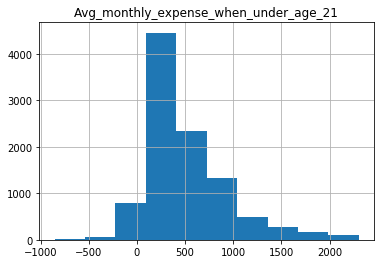

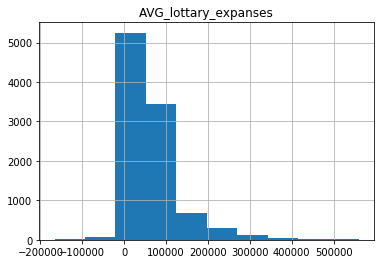

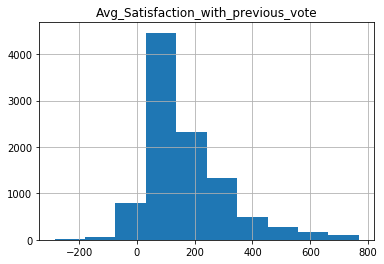

In [10]:
#let's look at the histogram of ages calculated without missing values
numeric_fields = df.select_dtypes(exclude=["object"])
for f in numeric_fields:
    if any(df[f] <0):
        df[f].hist(bins=10)
        p.title(f)
        p.show()

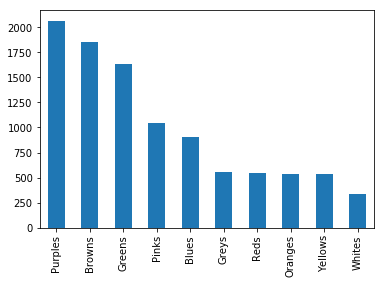

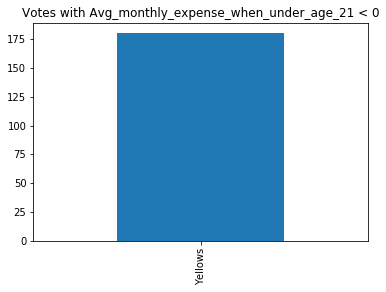

In [11]:
# numeric_fields = df.select_dtypes(exclude=["object"])
# for f in numeric_fields:
#     if any(df[f] < 0):
#         print f, df[df[f]<=0]
        

df['Vote'].value_counts().plot(kind='bar')
p.show()

df[df["Avg_monthly_expense_when_under_age_21"] < 0].Vote.value_counts().plot(kind='bar')
p.title("Votes with Avg_monthly_expense_when_under_age_21 < 0")
# a = df[df["Avg_monthly_expense_when_under_age_21"]<0]
# a
# a['Vote'].astype('category').cat.rename_categories(range(df['Vote'].nunique())).astype(int).hist()

# p.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
Vote                                             10000 non-null object
Occupation_Satisfaction                          10000 non-null float64
Avg_monthly_expense_when_under_age_21            10000 non-null float64
AVG_lottary_expanses                             10000 non-null float64
Most_Important_Issue                             10000 non-null object
Avg_Satisfaction_with_previous_vote              10000 non-null float64
Looking_at_poles_results                         10000 non-null object
Garden_sqr_meter_per_person_in_residancy_area    10000 non-null float64
Married                                          10000 non-null object
Gender                                           10000 non-null object
Voting_Time                                      10000 non-null object
Financial_balance_score_(0-1)                    10000 non-null float64
%Of_Household_Income              

In [13]:
numeric_fields = df.select_dtypes(exclude=["object"])
threshold = 3

for f in numeric_fields:
    std = df[f].std()
    mean = df[f].mean()
    df = df[df[f].between(mean - threshold *std, mean + threshold *std)] 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8543 entries, 0 to 9997
Data columns (total 38 columns):
Vote                                             8543 non-null object
Occupation_Satisfaction                          8543 non-null float64
Avg_monthly_expense_when_under_age_21            8543 non-null float64
AVG_lottary_expanses                             8543 non-null float64
Most_Important_Issue                             8543 non-null object
Avg_Satisfaction_with_previous_vote              8543 non-null float64
Looking_at_poles_results                         8543 non-null object
Garden_sqr_meter_per_person_in_residancy_area    8543 non-null float64
Married                                          8543 non-null object
Gender                                           8543 non-null object
Voting_Time                                      8543 non-null object
Financial_balance_score_(0-1)                    8543 non-null float64
%Of_Household_Income                           

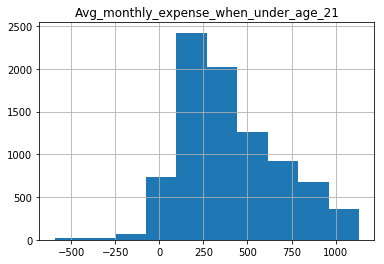

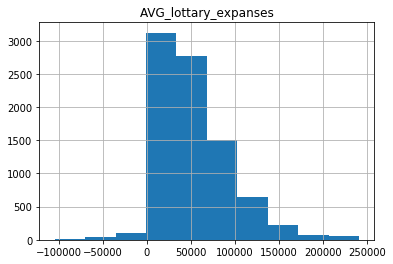

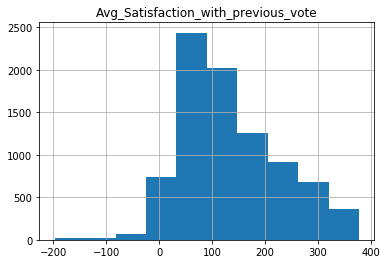

In [14]:
numeric_fields = df.select_dtypes(exclude=["object"])
for f in numeric_fields:
    if any(df[f] <0):
        df[f].hist(bins=10)
        p.title(f)
        p.show()

In [16]:
numeric_fields = df.select_dtypes(exclude=["object"])

for f in numeric_fields:
    df[f] = (df[f] - df[f].min()) / (df[f].max() - df[f].min())
    
df

,Vote,Occupation_Satisfaction,Avg_monthly_expense_when_under_age_21,AVG_lottary_expanses,Most_Important_Issue,Avg_Satisfaction_with_previous_vote,Looking_at_poles_results,Garden_sqr_meter_per_person_in_residancy_area,Married,Gender,...,Last_school_grades,Age_group,Number_of_differnt_parties_voted_for,Political_interest_Total_Score,Number_of_valued_Kneset_members,Main_transportation,Occupation,Overall_happiness_score,Num_of_kids_born_last_10_years,Financial_agenda_matters
0,Purples,1.000000,0.645203,0.499681,Healthcare,0.645203,No,0.469797,Yes,Male,...,0.714286,45_and_up,0.8,0.408765,0.454545,Public_or_other,Hightech,0.326809,0.333333,No
1,Greens,0.333333,0.746692,0.509459,Environment,0.746692,No,0.338014,Yes,Female,...,0.857143,30-45,0.2,0.686380,0.818182,Motorcycle_or_truck,Public_Sector,0.767554,0.000000,No
3,Pinks,0.555556,0.571368,0.563474,Social,0.571368,No,0.932301,No,Male,...,0.571429,Below_30,0.8,0.860890,0.272727,Motorcycle_or_truck,Student_or_Unemployed,0.471586,0.000000,Yes
5,Oranges,0.666667,0.657178,0.520432,Military,0.657178,No,0.508586,Yes,Female,...,0.000000,30-45,0.2,0.258580,0.272727,Motorcycle_or_truck,Public_Sector,0.396935,0.000000,No
6,Greens,0.888889,0.515092,0.375212,Healthcare,0.515092,No,0.253019,Yes,Male,...,0.714286,Below_30,0.2,0.648854,0.818182,Car,Student_or_Unemployed,0.709609,0.333333,No
7,Pinks,0.777778,0.378524,0.342688,Healthcare,0.378524,No,0.931532,No,Female,...,0.714286,Below_30,0.2,0.891570,0.181818,Motorcycle_or_truck,Industry_or_other,0.467027,0.333333,No
8,Greens,0.000000,0.469858,0.363750,Environment,0.469858,No,0.309964,Yes,Male,...,0.857143,30-45,0.0,0.677620,0.545455,Public_or_other,Industry_or_other,0.746391,0.000000,Yes
9,Yellows,0.222222,0.178501,0.132994,Social,0.178501,Yes,0.822695,No,Male,...,0.571429,30-45,0.4,0.638780,0.727273,Foot_or_bicycle,Public_Sector,0.284398,0.000000,Yes
10,Whites,0.777778,0.470612,0.416237,Financial,0.470612,No,0.696041,No,Male,...,0.428571,Below_30,0.0,0.420425,0.181818,Foot_or_bicycle,Student_or_Unemployed,0.412556,0.000000,Yes
11,Purples,0.000000,0.382677,0.327700,Healthcare,0.382677,No,0.455772,Yes,Female,...,0.714286,45_and_up,0.4,0.383079,0.818182,Foot_or_bicycle,Industry_or_other,0.415896,0.000000,No


In [22]:
df["Age_groupInt"] = df["Age_group"].map( {'Below_30':0, '30-45':1, '45_and_up': 2}).astype(int)
df["Voting_TimeInt"] = df["Voting_Time"].map( {'By_16:00':0, 'After_16:00':1}).astype(int)
df["GenderInt"] = df["Gender"].map( {'Male':-1, 'Female':1}).astype(int)

def transform_bool(name):
    df[name + "Int"] = df[name].map( {'No':-1, "Maybe": 0, 'Yes':1}).astype(int)

def transform_category(name):
    for cat in df[name].unique():
        df["Is_" + name +"_" + cat] = (df[name] == cat).astype(int)
    
transform_bool("Looking_at_poles_results")
transform_bool("Married")
transform_bool("Financial_agenda_matters")
transform_bool("Will_vote_only_large_party")
transform_category("Most_Important_Issue")
transform_category("Occupation")
transform_category("Main_transportation")


categorial_fields

,Vote,Most_Important_Issue,Looking_at_poles_results,Married,Gender,Voting_Time,Will_vote_only_large_party,Age_group,Main_transportation,Occupation,Financial_agenda_matters
0,Purples,Healthcare,No,Yes,Male,After_16:00,No,45_and_up,Public_or_other,Hightech,No
1,Greens,Environment,No,Yes,Female,By_16:00,No,30-45,Motorcycle_or_truck,Public_Sector,No
2,Browns,Healthcare,No,No,Female,By_16:00,No,45_and_up,Foot_or_bicycle,Services_or_Retail,Yes
3,Pinks,Social,No,No,Male,By_16:00,No,Below_30,Motorcycle_or_truck,Student_or_Unemployed,Yes
4,Blues,Healthcare,Yes,Yes,Male,After_16:00,Yes,Below_30,Foot_or_bicycle,Industry_or_other,Yes
5,Oranges,Military,No,Yes,Female,After_16:00,Maybe,30-45,Motorcycle_or_truck,Public_Sector,No
6,Greens,Healthcare,No,Yes,Male,After_16:00,No,Below_30,Car,Student_or_Unemployed,No
7,Pinks,Healthcare,No,No,Female,After_16:00,No,Below_30,Motorcycle_or_truck,Industry_or_other,No
8,Greens,Environment,No,Yes,Male,By_16:00,No,30-45,Public_or_other,Industry_or_other,Yes
9,Yellows,Social,Yes,No,Male,After_16:00,Yes,30-45,Foot_or_bicycle,Public_Sector,Yes


## Preparing the data for Machine Learning
### Cleaning the data, creating new features, transforming to numeric values, droping NaNs

#### "Sex" to int (binary)
> Transform to **Int** and store in a new 'Gender' columns

In [9]:
#Adding in new 'Gender' column to the dataframe
train['Gender'] = train['Sex'].map( {'female':0, 'male':1}).astype(int)
test['Gender'] = test['Sex'].map( {'female':0, 'male':1}).astype(int)

#Let's creat a crosstabcross-tabulation to look at this transformation
pd.crosstab(train.Gender, train.Sex, rownames=['Gender'], colnames=['Sex'])

Sex,female,male
Gender,,
0,314,0
1,0,577


#### "Embarked" is multicategorical - Transforme in two steps
1. Transform to **categoricl** and store in new 'Embarkport' columns
2. Transfom to **Int** and store in new 'EmbarkportInt' columns

In [10]:
train['Embarkport'] = train['Embarked'].astype("category")
train['EmbarkportInt'] = train['Embarkport'].cat.rename_categories(range(train['Embarkport'].nunique())).astype(int)
test['Embarkport'] = test['Embarked'].astype("category")
test['EmbarkportInt'] = test['Embarkport'].cat.rename_categories(range(test['Embarkport'].nunique())).astype(int)

#Let's creat a crosstabcross-tabulation to look at this transformation
pd.crosstab(train.EmbarkportInt, train.Embarked, rownames=['EmbarkportInt'], colnames=['Embarked'])

Embarked,C,Q,S
EmbarkportInt,,,
0,168,0,0
1,0,77,0
2,0,0,644


In [11]:
#Cleaning - drop the newly created columns
train = train.drop(['Embarkport','EmbarkportInt'], axis=1) 
test = test.drop(['Embarkport','EmbarkportInt'], axis=1)

## convert non-numeric data

In [12]:
# Identify which of the orginal features are objects
ObjFeat=train.keys()[train.dtypes.map(lambda x: x=='object')]

# Transform the original features to categorical
# Creat new 'int' features, resp.
for f in ObjFeat:
    train[f] = train[f].astype("category")
    train[f+"Int"] = train[f].cat.rename_categories(range(train[f].nunique())).astype(int)
    train.loc[train[f].isnull(), f+"Int"] = np.nan #fix NaN conversion

    # Let's creat a crosstabcross-tabulation to look at this transformation
    # pd.crosstab(train[f+"Int"], train[f], rownames=[f+"Int"], colnames=[f])
        
    test[f] = test[f].astype("category")        
    if test[f].cat.categories.isin(train[f].cat.categories).all():
        test[f] = test[f].cat.rename_categories(train[f].cat.categories)
    else:    
        print "\n\nTrain and Test doesnt share the same set of categories in feture '", f, "'" 
    test[f+"Int"] = test[f].cat.rename_categories(range(test[f].nunique())).astype(int)
    test.loc[test[f].isnull(), f+"Int"] = np.nan #fix NaN conversion



Train and Test doesnt share the same set of categories in feture ' Name '


Train and Test doesnt share the same set of categories in feture ' Ticket '


Train and Test doesnt share the same set of categories in feture ' Cabin '


## Missing Values
> Age has missing values 
> Create new 'AgeFill' column, where missing value is filled with the median of the gender and Pclass

In [13]:
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = train[(train['Gender'] == i) & 
                              (train['Pclass'] == j+1)]['Age'].dropna().median() 

median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [14]:
train['AgeFill'] = train['Age']
test['AgeFill'] = test['Age']

# Fill the missin values with medians
for i in range(0, 2):
    for j in range(0, 3):
        train.loc[ (train.Age.isnull()) & (train.Gender == i) & (train.Pclass == j+1),\
                'AgeFill'] = median_ages[i,j]
        test.loc[ (test.Age.isnull()) & (test.Gender == i) & (test.Pclass == j+1),\
                 'AgeFill'] = median_ages[i,j]

train[ train['Age'].isnull() ][['Gender','Pclass','Age','AgeFill']].head(10)

,Gender,Pclass,Age,AgeFill
5,1,3,NaN,25.0
17,1,2,NaN,30.0
19,0,3,NaN,21.5
26,1,3,NaN,25.0
28,0,3,NaN,21.5
29,1,3,NaN,25.0
31,0,1,NaN,35.0
32,0,3,NaN,21.5
36,1,3,NaN,25.0
42,1,3,NaN,25.0


In [15]:
# Create a feature that records whether the Age was originally missing
train['AgeIsNull'] = pd.isnull(train.Age).astype(int)
test['AgeIsNull'] = pd.isnull(test.Age).astype(int)

train[['Gender','Pclass','Age','AgeFill','AgeIsNull']].head(10)

,Gender,Pclass,Age,AgeFill,AgeIsNull
0,1,3,22.0,22.0,0
1,0,1,38.0,38.0,0
2,0,3,26.0,26.0,0
3,0,1,35.0,35.0,0
4,1,3,35.0,35.0,0
5,1,3,NaN,25.0,1
6,1,1,54.0,54.0,0
7,1,3,2.0,2.0,0
8,0,3,27.0,27.0,0
9,0,2,14.0,14.0,0


## Feature Construction
Parch is the number of parents or children onboard, 
and SibSp is the number of siblings or spouses. 
> We can aggregate them together to form a new 'FamilySize' 

In [16]:
train['FamilySize'] = train.SibSp + train.Parch
test['FamilySize'] = test.SibSp + test.Parch

Pclass had a large effect on survival, and it's possible Age will too.
>A Constructed feature is the Age and Pclass multiplication, thus amplifing 
old age and 3rd class - both were less likely to survive

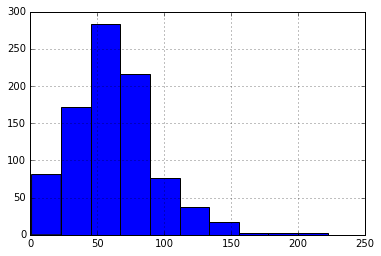

In [17]:
train['Age*Class'] = train.AgeFill * train.Pclass
test['Age*Class'] = test.AgeFill * test.Pclass

train['Age*Class'].hist()

## Final Preperations

In [18]:
# categorical columns
train.dtypes[ObjFeat]
test.dtypes[ObjFeat]

Name        category
Sex         category
Ticket      category
Cabin       category
Embarked    category
dtype: object

#### Drop the columns that will not be used in training

In [19]:
train = train.drop(ObjFeat, axis=1) 
test = test.drop(ObjFeat, axis=1) 

train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Gender           int32
NameInt        float64
SexInt         float64
TicketInt      float64
CabinInt       float64
EmbarkedInt    float64
AgeFill        float64
AgeIsNull        int32
FamilySize       int64
Age*Class      float64
dtype: object

#### Create training and testing sets that has no null (by dropping rםws ) 

In [21]:
train_noNaN = train.dropna()
test_noNaN = test.dropna()

train_noNaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 17 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Fare           183 non-null float64
Gender         183 non-null int32
NameInt        183 non-null float64
SexInt         183 non-null float64
TicketInt      183 non-null float64
CabinInt       183 non-null float64
EmbarkedInt    183 non-null float64
AgeFill        183 non-null float64
AgeIsNull      183 non-null int32
FamilySize     183 non-null int64
Age*Class      183 non-null float64
dtypes: float64(9), int32(2), int64(6)
memory usage: 24.3 KB


In [22]:
test_noNaN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 16 columns):
PassengerId    87 non-null int64
Pclass         87 non-null int64
Age            87 non-null float64
SibSp          87 non-null int64
Parch          87 non-null int64
Fare           87 non-null float64
Gender         87 non-null int32
NameInt        87 non-null float64
SexInt         87 non-null float64
TicketInt      87 non-null float64
CabinInt       87 non-null float64
EmbarkedInt    87 non-null float64
AgeFill        87 non-null float64
AgeIsNull      87 non-null int32
FamilySize     87 non-null int64
Age*Class      87 non-null float64
dtypes: float64(9), int32(2), int64(5)
memory usage: 10.9 KB


#### Convert to Numpy array

In [23]:
train_data_X = train.drop(['Survived'], axis=1).values
train_data_Y = train.Survived.values
test_data = test.values

train_data_X_noNaN = train_noNaN.drop(['Survived'], axis=1).values
train_data_Y_noNaN = train_noNaN.Survived.values
test_data_noNaN = test_noNaN.values

# Scikit-learn

## Feature Selection

In [28]:
# Import feature selection package
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, f_classif, mutual_info_classif

# Save original feature names
feat_names = train.drop(['Survived'], axis=1).columns.values

### Removing features with low variance

In [29]:
# Remove features that are of a low variance
varsel = VarianceThreshold(threshold=0.01)
train_data_X_noNaN = varsel.fit_transform(train_data_X_noNaN)
featsel_idx = varsel.get_support()

print 'Removing features with low variance - ','\t',feat_names[~featsel_idx]

Removing features with low variance -  	['AgeIsNull']


### Univariate feature selection

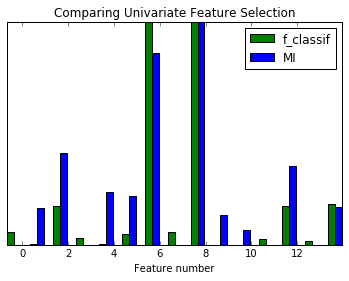

In [43]:
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 15% most significant features
selector = SelectPercentile(f_classif, percentile=15)
selector.fit(train_data_X_noNaN, train_data_Y_noNaN)
f_scores = selector.scores_
f_scores /= f_scores.max()

X_indices = np.arange(train_data_X_noNaN.shape[-1])

plt.bar(X_indices - .65, f_scores, width=.3,
        label='f_classif', color='g')

# Univariate feature selection with mutual information for feature scoring
selector = SelectPercentile(mutual_info_classif, percentile=15)
selector.fit(train_data_X_noNaN, train_data_Y_noNaN)
MI_scores = selector.scores_
MI_scores /= MI_scores.max()

plt.bar(X_indices - .35, MI_scores, width=.3,
        label='MI', color='b')

plt.title("Comparing Univariate Feature Selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

### Wrapper Methods

Optimal number of features : 8


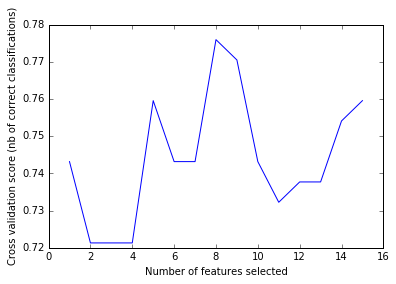

In [46]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# The "accuracy" scoring is proportional to the number of correct
# classifications
svc = SVC(kernel="linear", C=1)
rfecv = RFECV(estimator=svc, step=1, cv=3, scoring='accuracy')
rfecv.fit(train_data_X_noNaN, train_data_Y_noNaN)

minmax = MinMaxScaler()
scores = map(float, rfecv.ranking_)
scores = minmax.fit_transform(-1.0*np.array([scores]).T).T[0]

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Embedded Methods

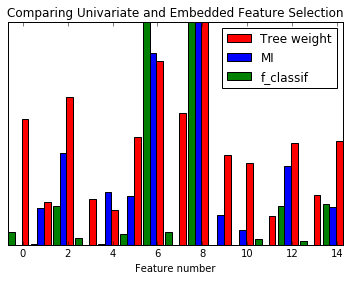

In [44]:
#Tree-based feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf = clf.fit(train_data_X_noNaN, train_data_Y_noNaN)
tree_weights = clf.feature_importances_  
tree_weights /= tree_weights.max()

plt.bar(X_indices - .05, tree_weights, width=.3, 
        label='Tree weight', color='r')
plt.bar(X_indices - .35, MI_scores, width=.3,
        label='MI', color='b')
plt.bar(X_indices - .65, f_scores, width=.3,
        label='f_classif', color='g')


plt.title("Comparing Univariate and Embedded Feature Selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

## Training Random Forest Classifier

In [48]:
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# Prepare train and test data using cross validation
X_train_noNaN, X_test_noNaN, y_train_noNaN, y_test_noNaN = train_test_split(train_data_X_noNaN, 
                                                                            train_data_Y_noNaN) 
                                                                            

# Create the random forest object which will include all the parameters
# for the fit
forest = RandomForestClassifier(n_estimators = 3)

# Fit the training data to the Survived labels and create the decision trees
forest = forest.fit(train_data_X_noNaN,train_data_Y_noNaN)

# output = forest.predict(test_data_noNaN)
y_pred_noNaN = forest.predict(X_test_noNaN)

print "accuracy:", metrics.accuracy_score(y_test_noNaN, y_pred_noNaN)
print "precision:", metrics.precision_score(y_test_noNaN, y_pred_noNaN)
print "recall:", metrics.recall_score(y_test_noNaN, y_pred_noNaN)
print "f1 score:", metrics.f1_score(y_test_noNaN, y_pred_noNaN)

accuracy: 0.95652173913
precision: 0.96875
recall: 0.96875
f1 score: 0.96875


## SVM

In [25]:
from sklearn.svm import SVC

clf = SVC().fit(X_train_noNaN, y_train_noNaN)
y_pred_noNaN = clf.predict(X_test_noNaN)

print "accuracy:", metrics.accuracy_score(y_test_noNaN, y_pred_noNaN)
print "precision:", metrics.precision_score(y_test_noNaN, y_pred_noNaN)
print "recall:", metrics.recall_score(y_test_noNaN, y_pred_noNaN)
print "f1 score:", metrics.f1_score(y_test_noNaN, y_pred_noNaN)

accuracy: 0.630434782609
precision: 0.630434782609
recall: 1.0
f1 score: 0.773333333333


### Create a K-Folds cross validation iterator

In [26]:
from sklearn.cross_validation import KFold

n_folds=5
kf = KFold(n=train_data_X_noNaN.shape[0], n_folds=n_folds)

print(kf)

sklearn.cross_validation.KFold(n=183, n_folds=5, shuffle=False, random_state=None)


### Train/Test Random Forest and SVM usin K-Fold cross validation

In [27]:
for k, (train_index, test_index) in enumerate(kf):
    # Random Forest
    forest = forest.fit(train_data_X_noNaN[train_index], train_data_Y_noNaN[train_index])
    y_pred_noNaN_RF = forest.predict(train_data_X_noNaN[test_index])
    #SVM
    clf = SVC().fit(train_data_X_noNaN[train_index], train_data_Y_noNaN[train_index])
    y_pred_noNaN_SVM = clf.predict(train_data_X_noNaN[test_index])
    
    #results    
    print("[fold {0}] RF score: {1:.5}, SVM score: {2:.5}".
          format(k, metrics.accuracy_score(train_data_Y_noNaN[test_index],y_pred_noNaN_RF), 
                 metrics.accuracy_score(train_data_Y_noNaN[test_index], y_pred_noNaN_SVM)))

[fold 0] RF score: 0.7027, SVM score: 0.51351
[fold 1] RF score: 0.75676, SVM score: 0.67568
[fold 2] RF score: 0.72973, SVM score: 0.67568
[fold 3] RF score: 0.66667, SVM score: 0.77778
[fold 4] RF score: 0.72222, SVM score: 0.72222
